In [9]:
import pandas as pd
from filterpy.kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def kalman_filter(y):
    
    y = np.array(y)
        # Initialize Kalman filter parameters
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.F = np.array([[1]])
    kf.H = np.array([[1]])
    # Process noise covariance
    kf.Q = np.array([[1e-3]])
    # Measurement noise covariance
    kf.R = np.array([[1e-1]])
    # Initial state
    kf.x = np.array([y[0]])

    # Initial state covariance
    kf.P *= 1e-2
    # Apply the Kalman filter to smooth the noisy data
    smoothed_values = []
    for measurement in y:
        kf.predict()
        kf.update(measurement)
        smoothed_values.append(kf.x[0])
    return smoothed_values


def plot_angle_graph_and_save(frames,angles):
    x = np.array(frames)
    y = np.array(angles)

    def normalize_to_range(arrays, target_range=(-10, 30)):
        # Find the min and max values across all arrays
        min_val = np.min(arrays)
        max_val = np.max(arrays)

        # Calculate the scaling factor
        scale_factor = (target_range[1] - target_range[0]) / (max_val - min_val)

        # Normalize each array
        normalized_arrays = [(array - min_val) * scale_factor + target_range[0] for array in arrays]

        return normalized_arrays


    labels = ["wrist_angle", "elbow_angle", "shoulder_angle", "hip_angle", "knee_angle", "ankle_angle"]
    labels_to_normalize = ["elbow_angle","hip_angle", "knee_angle", "ankle_angle"]
    normalization_threshold = { "hip_angle":(-30,0), "knee_angle":(0,-45), "ankle_angle":(-20,40)}
    df = pd.DataFrame(y,index=x,columns=labels)
    # df.to_excel(f'final_{str(x[0])}.xlsx')
    


    labels_to_plot = ["elbow_angle", "shoulder_angle", "wrist_angle","hip_angle", "knee_angle", "ankle_angle"]

    for col in labels_to_plot:
        y = df.loc[:,col]
        

        if col in labels_to_plot[3:]:
            y = normalize_to_range(y)

        if col != 'wrist_angle':
            y_smooth = kalman_filter(y)
        else:
            y = [-value for value in y]
            y_smooth = kalman_filter(y)
            
        if col in labels_to_plot[3:]:
            plt.plot(x, y_smooth, label=col,linewidth=0.4)
        else:
            plt.plot(x, y_smooth, label=col)

    # plt.axvline(x=release_frame, color='red', linestyle='--', label='Released')
    plt.title("Joint Flexion graph")
    plt.xlabel("frames")
    plt.ylabel("angles")
    plt.legend(loc="upper left", prop={'size':5})

    # Save the plot
    # plt.savefig(save_as)
    plt.show()
    plt.close()

In [73]:
df = pd.read_excel('final_101.xlsx')
x = df['Unnamed: 0']
y = df.iloc[:,1:]

101     79
102     77
103     82
104     83
105     84
      ... 
296    159
297    168
298    169
299    163
300    163
Name: elbow_angle, Length: 200, dtype: int64
79.0
101     0
102    -1
103     0
104    -1
105    -2
       ..
296     7
297     5
298     6
299    11
300    19
Name: shoulder_angle, Length: 200, dtype: int64
0.0
101    116
102    121
103    128
104    132
105    152
      ... 
296    102
297    113
298    103
299     92
300    101
Name: wrist_angle, Length: 200, dtype: int64
101     97
102     99
103    102
104    105
105    104
      ... 
296    129
297    119
298    114
299    109
300     99
Name: hip_angle, Length: 200, dtype: int64
0.8695652173913047
101    115
102    120
103    125
104    131
105    134
      ... 
296    123
297    121
298    125
299    123
300    125
Name: knee_angle, Length: 200, dtype: int64
7.826086956521738
101    133
102    132
103    133
104    130
105    130
      ... 
296    136
297    138
298    136
299    137
300    140
Name: ankle_an

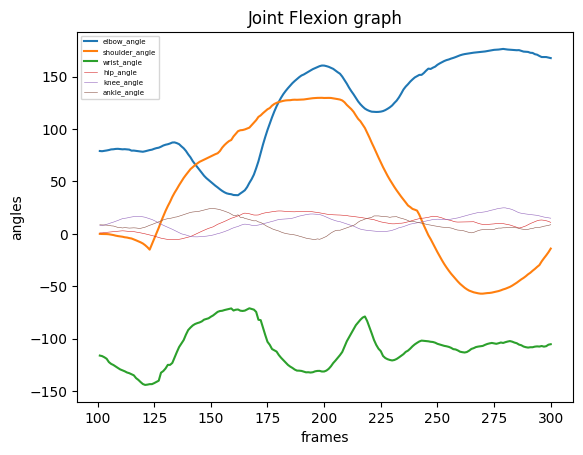

In [74]:
plot_angle_graph_and_save(x,y)

550     75
551     73
552     70
553     73
554     71
      ... 
698    178
699    179
700    175
701    178
702    174
Name: elbow_angle, Length: 153, dtype: int64
75.0
550   -10
551   -12
552   -11
553   -10
554   -10
       ..
698   -55
699   -58
700   -59
701   -61
702   -62
Name: shoulder_angle, Length: 153, dtype: int64
-10.0
550    115
551    114
552    120
553    122
554    123
      ... 
698    120
699    118
700    110
701    114
702    113
Name: wrist_angle, Length: 153, dtype: int64
550    113
551    113
552    108
553    111
554    106
      ... 
698    136
699    137
700    136
701    126
702    122
Name: hip_angle, Length: 153, dtype: int64
8.352941176470587
550    126
551    126
552    125
553    129
554    125
      ... 
698    141
699    142
700    143
701    141
702    140
Name: knee_angle, Length: 153, dtype: int64
12.471910112359549
550    140
551    140
552    134
553    137
554    133
      ... 
698    126
699    126
700    123
701    122
702    120
Name: ankle_

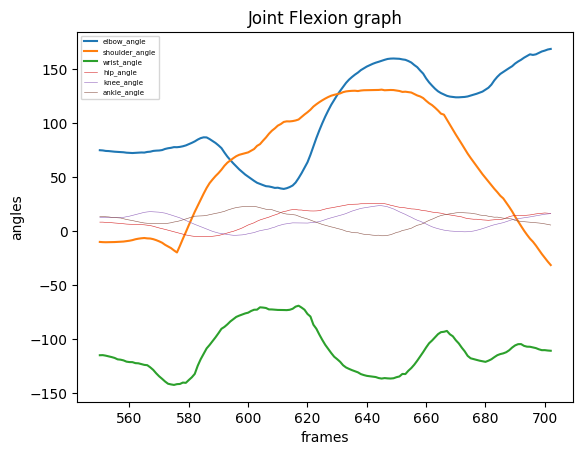

In [75]:
df = pd.read_excel('final_550.xlsx')
x = df['Unnamed: 0']
y = df.iloc[:,1:]
plot_angle_graph_and_save(x,y)